In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Dropout
from tensorflow.keras import Sequential 
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from IPython.display import Image
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2

In [ ]:
#!unzip "/content/drive/MyDrive/Flowers Recognition/archive.zip" -d "/content/drive/MyDrive/Flowers Recognition/" 

Let's see one image

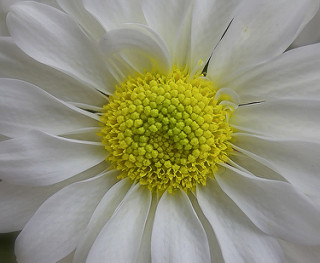

In [ ]:
Image("/content/drive/MyDrive/Flowers Recognition/flowers/daisy/100080576_f52e8ee070_n.jpg")

# Load Data

In [ ]:
labels = ["daisy", "dandelion", "rose", "sunflower", "tulip"] #sırasıyla

In [ ]:
#Subdirectories
for label in labels:
  half_path = os.path.join("/content/drive/MyDrive/Flowers Recognition/flowers", label)
  print(half_path)

/content/drive/MyDrive/Flowers Recognition/flowers/daisy
/content/drive/MyDrive/Flowers Recognition/flowers/dandelion
/content/drive/MyDrive/Flowers Recognition/flowers/rose
/content/drive/MyDrive/Flowers Recognition/flowers/sunflower
/content/drive/MyDrive/Flowers Recognition/flowers/tulip


In [ ]:
IMG_SIZE = (224,224)

def load_data(dir, label):

  data = [] #X
  lbls = [] #y

  for label in labels: # daisy or dandelion or tulip or rose or sunflower
    path = os.path.join(dir, label) #path= dir + label
    class_num = labels.index(label) #as indexes, not names

    for img in os.listdir(path):      
      img = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
      img = cv2.resize(img, IMG_SIZE)
      data.append([img]) #pixel values of images
      lbls.append([class_num]) #labels

  return data, lbls

In [ ]:
data, lbls = load_data("/content/drive/MyDrive/Flowers Recognition/flowers", labels)

In [ ]:
len(data), len(lbls)

(4317, 4317)

In [ ]:
data

[[array([[[ 81,  16,  26],
          [ 79,  16,  26],
          [ 79,  16,  26],
          ...,
          [100,  53,  65],
          [ 99,  58,  76],
          [101,  58,  80]],
  
         [[ 80,  17,  27],
          [ 80,  17,  27],
          [ 79,  16,  25],
          ...,
          [ 99,  46,  59],
          [ 98,  53,  71],
          [ 97,  52,  74]],
  
         [[ 78,  17,  27],
          [ 79,  17,  27],
          [ 79,  16,  25],
          ...,
          [100,  47,  61],
          [101,  51,  68],
          [ 95,  50,  72]],
  
         ...,
  
         [[ 50,  12,  24],
          [ 81,  25,  45],
          [ 85,  27,  51],
          ...,
          [ 51,  15,  30],
          [ 49,  14,  25],
          [ 55,  18,  31]],
  
         [[ 73,  23,  39],
          [ 88,  30,  51],
          [ 90,  32,  55],
          ...,
          [ 49,  14,  28],
          [ 48,  13,  27],
          [ 47,  12,  24]],
  
         [[ 84,  28,  48],
          [ 88,  28,  52],
          [100,  38,  61

In [ ]:
lbls

[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0]

##Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, lbls, test_size=0.2)


## Preprocess

In [ ]:
#Turn into tensors
X_train = tf.constant(X_train)
X_test = tf.constant(X_test)

#Adjust the data types
X_train = tf.cast(X_train, float)
X_test = tf.cast(X_test, float)

In [ ]:
#Normalization
X_train = X_train/255.
X_test = X_test/255.

In [ ]:
#Reshaping
IMG_SIZE1 = 224
X_train = tf.reshape(X_train, (-1, IMG_SIZE1, IMG_SIZE1, 3))
X_test = tf.reshape(X_test, (-1, IMG_SIZE1, IMG_SIZE1, 3))

In [ ]:
#One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

Creating Model

In [ ]:
mdl1 = Sequential([ 
                   tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
                   Conv2D(32, 5, activation="relu", padding="same"),
                   Conv2D(64, 3, activation="relu", padding="same"),
                   MaxPool2D(2),
                   Conv2D(96, 3, activation="relu", padding="same"),
                   Conv2D(128, 3, activation="relu", padding="same"),
                   MaxPool2D(2),
                   Flatten(),
                   Dense(256, activation="relu"),
                   Dense(5, activation="softmax")
])

#LR Annealer
reduce_lr = ReduceLROnPlateau(monitor="val_accuracy", 
                              factor=0.2, #decrease LR by 20% in case val_accuracy does not improve
                              mode="max", 
                              patience=3, 
                              min_lr=0.00001)

mdl1.compile(loss="categorical_crossentropy",
             optimizer=Adam(),
             metrics=["accuracy"])

In [ ]:
hstry1 = mdl1.fit(X_train, y_train,
                  epochs=5,
                  batch_size=32,
                  callbacks=[reduce_lr],
                  validation_data=(X_test, y_test))

Epoch 1/5
108/108 [==============================] - 39s 236ms/step - loss: 1.7659 - accuracy: 0.3863 - val_loss: 1.2053 - val_accuracy: 0.4653 - lr: 0.0010
Epoch 2/5
108/108 [==============================] - 23s 217ms/step - loss: 1.1247 - accuracy: 0.5323 - val_loss: 1.0637 - val_accuracy: 0.5602 - lr: 0.0010
Epoch 3/5
108/108 [==============================] - 24s 220ms/step - loss: 0.9685 - accuracy: 0.6128 - val_loss: 0.9637 - val_accuracy: 0.6042 - lr: 0.0010
Epoch 4/5
108/108 [==============================] - 24s 218ms/step - loss: 0.8203 - accuracy: 0.6826 - val_loss: 1.0646 - val_accuracy: 0.5903 - lr: 0.0010
Epoch 5/5
108/108 [==============================] - 24s 220ms/step - loss: 0.5605 - accuracy: 0.7895 - val_loss: 1.2086 - val_accuracy: 0.5521 - lr: 0.0010


55%

Plotting the Results

In [ ]:
def plot_loss_acc(hstry):
  loss = hstry.history["loss"]
  val_loss = hstry.history["val_loss"]
  acc = hstry.history["accuracy"]
  val_acc = hstry.history["val_accuracy"]
  epochs = range(len(hstry.history["loss"]))

  #1st graph
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.legend()
  plt.title("Losses")
  plt.xlabel("Epochs")

  #2nd graph
  plt.figure()
  plt.plot(epochs, acc, label="train_acc")
  plt.plot(epochs, val_acc, label="val_acc")
  plt.legend()
  plt.title("Accuracies")
  plt.xlabel("Epochs");

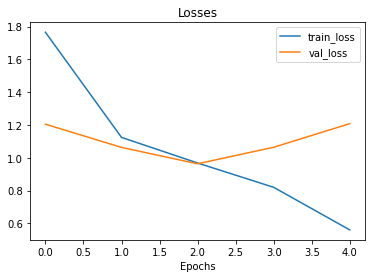

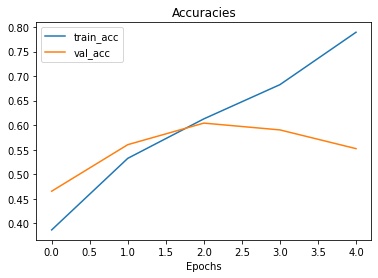

In [ ]:
plot_loss_acc(hstry1)

Overfitted.

Increasing MaxPool2D s in order to reduce overfitting.

In [ ]:
mdl2 = Sequential([
                   tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
                   Conv2D(32, 5, activation="relu", padding="same"),
                   MaxPool2D(2),
                   Conv2D(64, 3, activation="relu", padding="same"),
                   MaxPool2D(2),
                   Conv2D(96, 3, activation="relu", padding="same"),
                   MaxPool2D(2),
                   Conv2D(128, 3, activation="relu", padding="same"),
                   MaxPool2D(2),
                   Flatten(),
                   Dense(256, activation="relu"),
                   Dense(5, activation="softmax")
])

mdl2.compile(loss="categorical_crossentropy",
             optimizer=Adam(),
             metrics=["accuracy"])

In [ ]:
hstry2 = mdl2.fit(X_train, y_train,
                  epochs=5,
                  batch_size=32,
                  callbacks=[reduce_lr],
                  validation_data=(X_test, y_test))

Epoch 1/5
108/108 [==============================] - 9s 74ms/step - loss: 1.3844 - accuracy: 0.3999 - val_loss: 1.1797 - val_accuracy: 0.5243 - lr: 0.0010
Epoch 2/5
108/108 [==============================] - 7s 69ms/step - loss: 1.0579 - accuracy: 0.5948 - val_loss: 0.9604 - val_accuracy: 0.6123 - lr: 0.0010
Epoch 3/5
108/108 [==============================] - 7s 69ms/step - loss: 0.9277 - accuracy: 0.6334 - val_loss: 0.9216 - val_accuracy: 0.6551 - lr: 0.0010
Epoch 4/5
108/108 [==============================] - 8s 74ms/step - loss: 0.7792 - accuracy: 0.7061 - val_loss: 0.8706 - val_accuracy: 0.6551 - lr: 0.0010
Epoch 5/5
108/108 [==============================] - 7s 68ms/step - loss: 0.6064 - accuracy: 0.7701 - val_loss: 0.9051 - val_accuracy: 0.6678 - lr: 0.0010


In [ ]:
plot_loss_acc(hstry2)

67%. Increased. Good. However overfitted in the end again. Let's add Dropout layers.

In [ ]:
mdl3 = Sequential([
                   tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),

                   Conv2D(32, 3, activation="relu", padding="same"),
                   MaxPool2D(2, 2),
                   Dropout(0.2),

                   Conv2D(64, 3, activation="relu", padding="same"),
                   MaxPool2D(2, 2),
                   Dropout(0.3),

                   Conv2D(128, 3, activation="relu", padding="same"),
                   MaxPool2D(2, 2),
                   Dropout(0.2),

                   Conv2D(256, 3, activation="relu", padding="same"),
                   MaxPool2D(2),
                   Dropout(0.3),

                   Flatten(),
                   Dense(512, activation="relu"),
                   Dropout(0.5),
                   Dense(5, activation="softmax")
])


mdl3.compile(loss="categorical_crossentropy",
             optimizer=Adam(),
             metrics=["accuracy"])

In [ ]:
hstry3 = mdl3.fit(X_train, y_train,
                  epochs=5,
                  batch_size=32,
                  callbacks=[reduce_lr],
                  validation_data=(X_test, y_test))

In [ ]:
plot_loss_acc(hstry3)

68%. Increased. And overfitting is decreased. Better. We should try Data Augmentation.

## Data Augmentation

In [ ]:
aug_train_datagen = ImageDataGenerator(rotation_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       horizontal_flip=True,
                                       vertical_flip=True)

test_datagen = ImageDataGenerator()

#data = datagen.flow(X, y, batch_size)
aug_train_data = aug_train_datagen.flow(X_train, y_train, batch_size=32) 
test_data = test_datagen.flow(X_test, y_test, batch_size=32)

`data = datagen.flow(X, y, batch_size)`

In [ ]:
hstry4 = mdl3.fit(aug_train_data, 
                  epochs=10,
                  steps_per_epoch=len(aug_train_data),
                  validation_data=(test_data),
                  validation_steps=len(test_data),
                  callbacks=[reduce_lr])

Epoch 1/10
108/108 [==============================] - 38s 345ms/step - loss: 1.0413 - accuracy: 0.5943 - val_loss: 0.9143 - val_accuracy: 0.6343 - lr: 0.0010
Epoch 2/10
108/108 [==============================] - 37s 345ms/step - loss: 0.9808 - accuracy: 0.6114 - val_loss: 0.8984 - val_accuracy: 0.6447 - lr: 0.0010
Epoch 3/10
108/108 [==============================] - 37s 341ms/step - loss: 0.9566 - accuracy: 0.6345 - val_loss: 0.8347 - val_accuracy: 0.6551 - lr: 0.0010
Epoch 4/10
108/108 [==============================] - 38s 348ms/step - loss: 0.9287 - accuracy: 0.6380 - val_loss: 0.8055 - val_accuracy: 0.6782 - lr: 0.0010
Epoch 5/10
108/108 [==============================] - 37s 342ms/step - loss: 0.9083 - accuracy: 0.6476 - val_loss: 0.8746 - val_accuracy: 0.6725 - lr: 0.0010
Epoch 6/10
108/108 [==============================] - 37s 340ms/step - loss: 0.8689 - accuracy: 0.6655 - val_loss: 0.7823 - val_accuracy: 0.7025 - lr: 0.0010
Epoch 7/10
108/108 [==============================] 

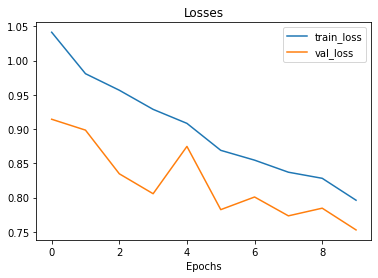

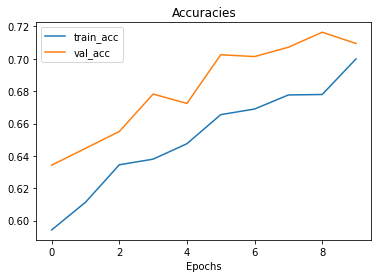

In [ ]:
plot_loss_acc(hstry4)

71%. Accuracy is good but graphs are not well enough. However for these kind of datasets, this might be enough.

Transfer Learning must be done. With Transfer Learning the accuracy can go high up as ~98%.